# Optimizing Portfolio Performance: A Comprehensive Analysis of Risk and Return for a Model Portfolio 

## Objective of the Study : 

The objective of this study is to construct a model portfolio and analyze its return performance over the last 5 years. The primary focus is on simulating and evaluating more than 100,000 unique portfolios to identify the optimal configuration. The optimization process aims to discover portfolios with an ideal Sharpe ratio, striking a balance between favorable risk and reward ratios. The study encompasses a comprehensive examination of the historical returns of the selected stocks within the portfolio, employing sophisticated simulations to strategically diversify assets. By leveraging this quantitative approach, we seek to pinpoint portfolios that exhibit an optimal combination of risk management and return potential.

## Important Libraries

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns

## Data Collection

We will curate a portfolio comprising seven stocks, strategically chosen based on their dominant market capitalization across diverse sectors. The selected sectors encompass Banking, FMCG (Fast Moving Consumer Goods), Pharmaceuticals, Information Technology (IT), Metal, Realty, and Automobile. Our data collection spans the last five years, commencing from December 31, 2018, to December 31, 2023. To gather the historical stock data for analysis, we employ the "YFinance" library, leveraging its capabilities to extract and compile comprehensive datasets for our selected stocks over the specified timeframe.

In [2]:
stocks = yf.download(["M&M.NS","HDFCBANK.NS", "ITC.NS","SUNPHARMA.NS","TATASTEEL.NS",
             "INFY.NS","DLF.NS"], start = "2018-12-31", end = "2023-12-31")

[*********************100%%**********************]  7 of 7 completed


In [3]:
stocks.to_csv("NSE_port.csv")

In [4]:
stocks = pd.read_csv("NSE_port.csv", header =[0,1], index_col = [0], parse_dates = [0])

In [5]:
stocks.head()

Adj Close                                                   \
                DLF.NS  HDFCBANK.NS     INFY.NS      ITC.NS      M&M.NS   
Date                                                                      
2018-12-31  169.965057  1023.645203  574.722595  233.427521  764.700012   
2019-01-01  172.597549  1036.382446  580.042908  234.297745  735.685425   
2019-01-02  165.705170  1026.925903  583.531677  232.557327  705.576904   
2019-01-03  165.082916  1018.868774  583.618896  231.106934  683.316528   
2019-01-04  167.667572  1021.594666  576.554260  232.847397  690.261047   

                                           Close                           \
           SUNPHARMA.NS TATASTEEL.NS      DLF.NS  HDFCBANK.NS     INFY.NS   
Date                                                                        
2018-12-31   409.890900    44.481033  177.550003  1060.849976  658.950012   
2019-01-01   412.794891    44.028584  180.300003  1074.050049  665.049988   
2019-01-02   418.983704    42.141949  173.100006  1064.250000  669.049988   
2019-01-03   415.222809    41.083385  172.449997  1055.900024  669.150024   
2019-01-04   413.032928    41.629738  175.149994  1058.724976  661.049988   

            ...        Open                             Volume              \
            ...      M&M.NS SUNPHARMA.NS TATASTEEL.NS   DLF.NS HDFCBANK.NS   
Date        ...                                                              
2018-12-31  ...  808.900024   428.100006    52.000000  4653719     2933264   
2019-01-01  ...  805.000000   432.500000    52.400002  6246700     3186720   
2019-01-02  ...  772.799988   430.500000    50.599998  6604177     4067116   
2019-01-03  ...  743.400024   442.049988    49.299999  5873745     6385832   
2019-01-04  ...  720.000000   439.100006    48.099998  5556175     3643560   

                                                                  
            INFY.NS   ITC.NS    M&M.NS SUNPHARMA.NS TATASTEEL.NS  
Date                                                              
2018-12-31  3373319  5452405   2232551      6368707     79658120  
2019-01-01  2943390  2490548   3442903      8487116     41281730  
2019-01-02  7416655  9934187  10596260      9656878    117473500  
2019-01-03  6827249  6114946  11084172      9479511    135329440  
2019-01-04  7889310  7805148   5919404      6228693    104800720  

[5 rows x 42 columns]

In [6]:
stocks = stocks["Adj Close"].copy()

In [7]:
stocks

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2018-12-31,169.965057,1023.645203,574.722595,233.427521,764.700012,409.890900,44.481033
2019-01-01,172.597549,1036.382446,580.042908,234.297745,735.685425,412.794891,44.028584
2019-01-02,165.705170,1026.925903,583.531677,232.557327,705.576904,418.983704,42.141949
2019-01-03,165.082916,1018.868774,583.618896,231.106934,683.316528,415.222809,41.083385
2019-01-04,167.667572,1021.594666,576.554260,232.847397,690.261047,413.032928,41.629738
...,...,...,...,...,...,...,...
2023-12-22,715.950012,1670.849976,1562.900024,455.200012,1634.250000,1243.650024,133.550003
2023-12-26,714.849976,1682.449951,1543.949951,456.450012,1662.250000,1247.500000,135.199997
2023-12-27,720.450012,1703.300049,1567.099976,457.100006,1687.949951,1252.449951,137.199997


In [8]:
stocks.head()

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2018-12-31,169.965057,1023.645203,574.722595,233.427521,764.700012,409.890900,44.481033
2019-01-01,172.597549,1036.382446,580.042908,234.297745,735.685425,412.794891,44.028584
2019-01-02,165.705170,1026.925903,583.531677,232.557327,705.576904,418.983704,42.141949
2019-01-03,165.082916,1018.868774,583.618896,231.106934,683.316528,415.222809,41.083385
2019-01-04,167.667572,1021.594666,576.554260,232.847397,690.261047,413.032928,41.629738


In [9]:
stocks.tail()

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2023-12-22,715.950012,1670.849976,1562.900024,455.200012,1634.250000,1243.650024,133.550003
2023-12-26,714.849976,1682.449951,1543.949951,456.450012,1662.250000,1247.500000,135.199997
2023-12-27,720.450012,1703.300049,1567.099976,457.100006,1687.949951,1252.449951,137.199997
2023-12-28,728.650024,1705.250000,1562.650024,464.100006,1734.449951,1262.150024,138.149994
2023-12-29,726.400024,1709.250000,1542.900024,462.100006,1729.400024,1259.449951,139.600006


## Normalization:

In this phase, we apply normalization techniques to enhance the clarity and visual representation of historical performance data. Adopting a base value of 100 for the initial period of the portfolio, normalization facilitates a more accessible interpretation of the stock data. This process ensures that variations in stock prices are presented relative to the chosen baseline, contributing to a clearer understanding and effective visualization of the historical performance trends.

In [10]:
norm = stocks.div(stocks.iloc[0]).mul(100)

In [11]:
norm

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2018-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-01-01,101.548843,101.244303,100.925718,100.372803,96.205756,100.708479,98.982825
2019-01-02,97.493669,100.320492,101.532754,99.627210,92.268457,102.218347,94.741389
2019-01-03,97.127562,99.533390,101.547930,99.005864,89.357463,101.300812,92.361581
2019-01-04,98.648260,99.799683,100.318704,99.751476,90.265599,100.766552,93.589862
...,...,...,...,...,...,...,...
2023-12-22,421.233648,163.225498,271.939895,195.007003,213.711256,303.410011,300.240334
2023-12-26,420.586435,164.358700,268.642640,195.542501,217.372822,304.349280,303.949767
2023-12-27,423.881251,166.395548,272.670674,195.820957,220.733611,305.556906,308.446065


In [12]:
cf.go_offline()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5228\1167756205.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



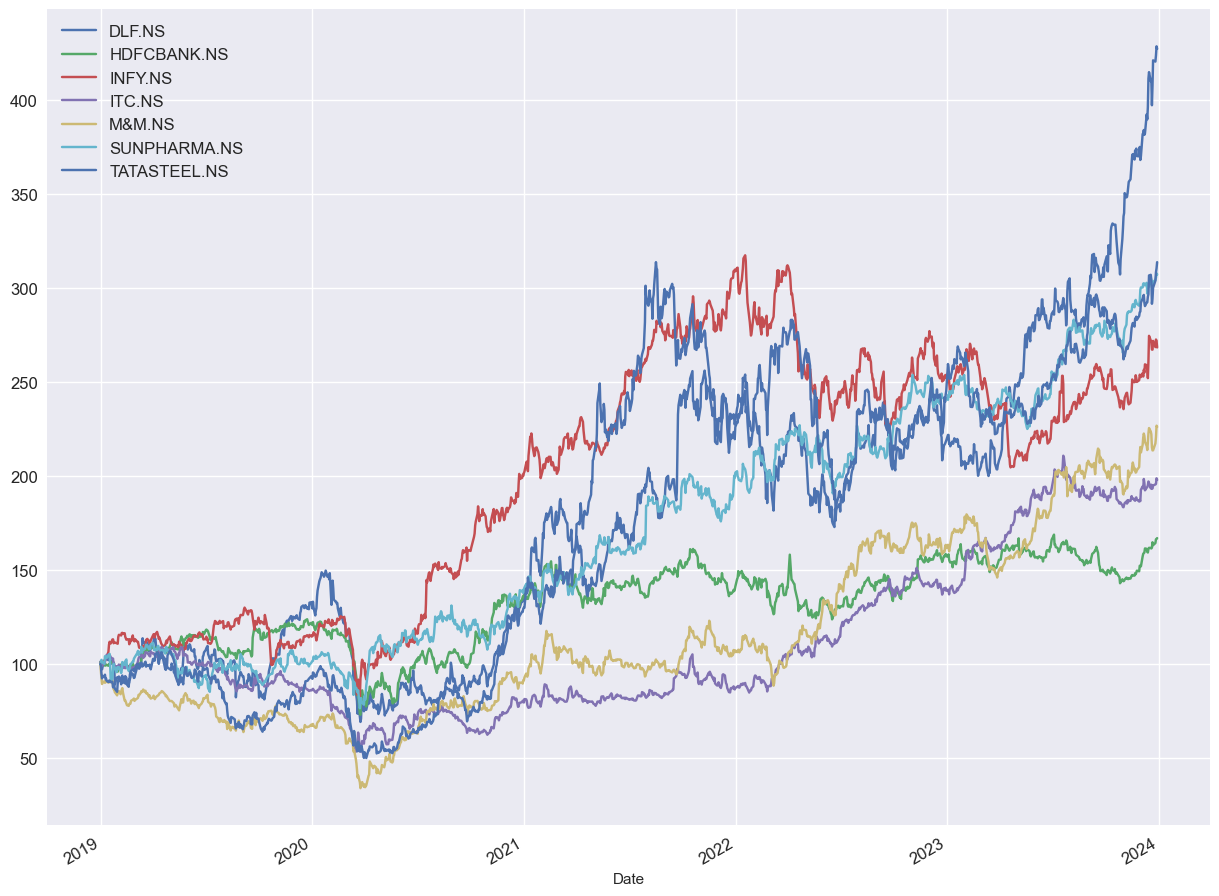

In [13]:
plt.style.use("seaborn")
norm.plot(figsize = (15,12), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [14]:
norm.iplot()

## Creating Equal Weighted Portfolios

In [15]:
stocks.head()

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2018-12-31,169.965057,1023.645203,574.722595,233.427521,764.700012,409.890900,44.481033
2019-01-01,172.597549,1036.382446,580.042908,234.297745,735.685425,412.794891,44.028584
2019-01-02,165.705170,1026.925903,583.531677,232.557327,705.576904,418.983704,42.141949
2019-01-03,165.082916,1018.868774,583.618896,231.106934,683.316528,415.222809,41.083385
2019-01-04,167.667572,1021.594666,576.554260,232.847397,690.261047,413.032928,41.629738


In [16]:
ret = stocks.pct_change().dropna()

In [17]:
ret

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2019-01-01,0.015488,0.012443,0.009257,0.003728,-0.037942,0.007085,-0.010172
2019-01-02,-0.039933,-0.009125,0.006015,-0.007428,-0.040926,0.014992,-0.042850
2019-01-03,-0.003755,-0.007846,0.000149,-0.006237,-0.031549,-0.008976,-0.025119
2019-01-04,0.015657,0.002675,-0.012105,0.007531,0.010163,-0.005274,0.013299
2019-01-07,0.026549,0.001511,0.016111,0.002491,0.005444,-0.006916,-0.004409
...,...,...,...,...,...,...,...
2023-12-22,0.033266,-0.009397,0.017513,0.008307,0.000245,0.008229,0.019466
2023-12-26,-0.001536,0.006943,-0.012125,0.002746,0.017133,0.003096,0.012355
2023-12-27,0.007834,0.012393,0.014994,0.001424,0.015461,0.003968,0.014793


In [18]:
ret.head()

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2019-01-01,0.015488,0.012443,0.009257,0.003728,-0.037942,0.007085,-0.010172
2019-01-02,-0.039933,-0.009125,0.006015,-0.007428,-0.040926,0.014992,-0.042850
2019-01-03,-0.003755,-0.007846,0.000149,-0.006237,-0.031549,-0.008976,-0.025119
2019-01-04,0.015657,0.002675,-0.012105,0.007531,0.010163,-0.005274,0.013299
2019-01-07,0.026549,0.001511,0.016111,0.002491,0.005444,-0.006916,-0.004409


In [19]:
ret.mean(axis = 1)

Date
2019-01-01   -0.000016
2019-01-02   -0.017036
2019-01-03   -0.011905
2019-01-04    0.004564
2019-01-07    0.005826
                ...   
2023-12-22    0.011090
2023-12-26    0.004087
2023-12-27    0.010124
2023-12-28    0.009603
2023-12-29   -0.001749
Length: 1235, dtype: float64

In [20]:
no_assets = len(stocks.columns)
no_assets

7

In [21]:
weights = [1/no_assets for i in range (no_assets)]
weights

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285]

In [22]:
ret.mul(weights, axis = "columns")

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2019-01-01,0.002213,0.001778,0.001322,0.000533,-0.005420,0.001012,-0.001453
2019-01-02,-0.005705,-0.001304,0.000859,-0.001061,-0.005847,0.002142,-0.006121
2019-01-03,-0.000536,-0.001121,0.000021,-0.000891,-0.004507,-0.001282,-0.003588
2019-01-04,0.002237,0.000382,-0.001729,0.001076,0.001452,-0.000753,0.001900
2019-01-07,0.003793,0.000216,0.002302,0.000356,0.000778,-0.000988,-0.000630
...,...,...,...,...,...,...,...
2023-12-22,0.004752,-0.001342,0.002502,0.001187,0.000035,0.001176,0.002781
2023-12-26,-0.000219,0.000992,-0.001732,0.000392,0.002448,0.000442,0.001765
2023-12-27,0.001119,0.001770,0.002142,0.000203,0.002209,0.000567,0.002113


In [23]:
ret.mul(weights, axis = "columns").sum(axis = 1)

Date
2019-01-01   -0.000016
2019-01-02   -0.017036
2019-01-03   -0.011905
2019-01-04    0.004564
2019-01-07    0.005826
                ...   
2023-12-22    0.011090
2023-12-26    0.004087
2023-12-27    0.010124
2023-12-28    0.009603
2023-12-29   -0.001749
Length: 1235, dtype: float64

In [24]:
ret.dot(weights)

Date
2019-01-01   -0.000016
2019-01-02   -0.017036
2019-01-03   -0.011905
2019-01-04    0.004564
2019-01-07    0.005826
                ...   
2023-12-22    0.011090
2023-12-26    0.004087
2023-12-27    0.010124
2023-12-28    0.009603
2023-12-29   -0.001749
Length: 1235, dtype: float64

In [25]:
ret["EWP"] = ret.dot(weights)

In [26]:
ret.head()

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS,EWP
Date,,,,,,,,
2019-01-01,0.015488,0.012443,0.009257,0.003728,-0.037942,0.007085,-0.010172,-0.000016
2019-01-02,-0.039933,-0.009125,0.006015,-0.007428,-0.040926,0.014992,-0.042850,-0.017036
2019-01-03,-0.003755,-0.007846,0.000149,-0.006237,-0.031549,-0.008976,-0.025119,-0.011905
2019-01-04,0.015657,0.002675,-0.012105,0.007531,0.010163,-0.005274,0.013299,0.004564
2019-01-07,0.026549,0.001511,0.016111,0.002491,0.005444,-0.006916,-0.004409,0.005826


In [27]:
summary = ret.agg(["mean", "std"]).T

In [28]:
summary

,mean,std
DLF.NS,0.001533,0.026618
HDFCBANK.NS,0.000559,0.016929
INFY.NS,0.000965,0.018124
ITC.NS,0.000689,0.016460
M&M.NS,0.000885,0.021258
SUNPHARMA.NS,0.001066,0.017723
TATASTEEL.NS,0.001230,0.024636
EWP,0.000990,0.013479


In [29]:
summary.columns = ["Return", "Risk"]

In [30]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk*np.sqrt(252)

In [31]:
summary

,Return,Risk
DLF.NS,0.386259,0.422542
HDFCBANK.NS,0.140742,0.268732
INFY.NS,0.243261,0.287713
ITC.NS,0.173702,0.261294
M&M.NS,0.223042,0.337465
SUNPHARMA.NS,0.268579,0.281338
TATASTEEL.NS,0.309968,0.391087
EWP,0.249365,0.213969


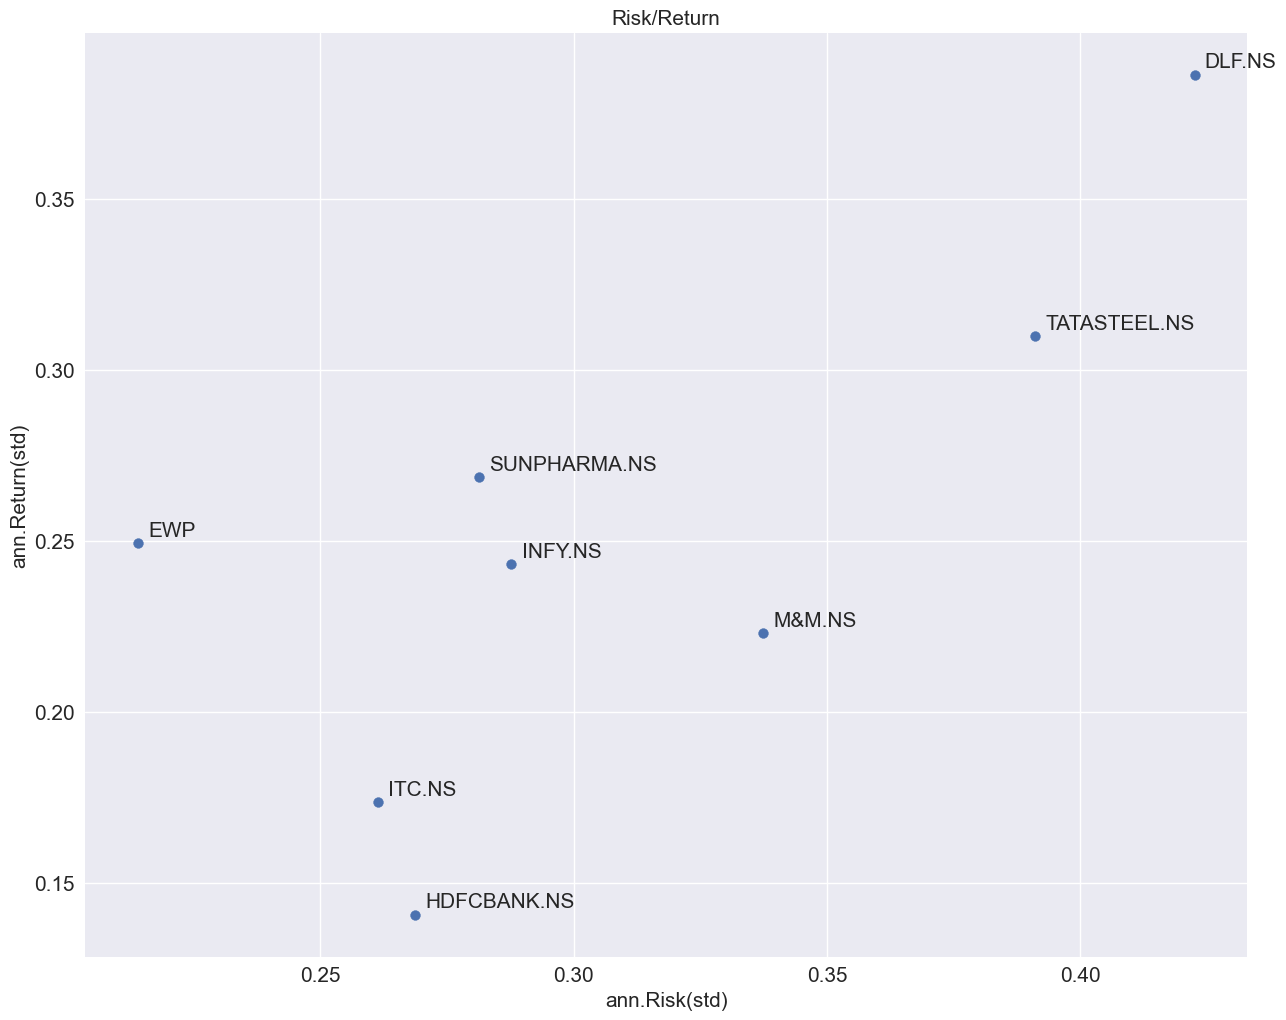

In [32]:
summary.plot(kind = "scatter", x = "Risk", y = "Return",figsize = (15,12), s = 50, fontsize = 15 )
for i in summary.index:
   plt.annotate(i , xy = (summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"] + 0.002), size = 15)
plt.xlabel("ann.Risk(std)", fontsize = 15)
plt.ylabel("ann.Return(std)", fontsize = 15)
plt.title("Risk/Return", fontsize = 15)
plt.show()

## Random Portfolios

In [33]:
pd.options.display.float_format = '{:.2f}'.format

In [34]:
def ann_risk_return(returns_df):
    ## Calculate the mean (Return) and standard deviation (Risk) of returns for each asset
    summary = returns_df.agg(["mean", "std"]).T
    # we have to rename the colum for clarity
    summary.columns = ["Return", "Risk"]
    #Annualize the Return and Risk by multiplying by the square root of the number of trading days in a year (252)
    summary.Return = summary.Return* 252
    summary.Risk = summary.Risk*np.sqrt(252)
    return summary

In [35]:
ret = stocks.pct_change().dropna()

In [36]:
ret

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2019-01-01,0.02,0.01,0.01,0.00,-0.04,0.01,-0.01
2019-01-02,-0.04,-0.01,0.01,-0.01,-0.04,0.01,-0.04
2019-01-03,-0.00,-0.01,0.00,-0.01,-0.03,-0.01,-0.03
2019-01-04,0.02,0.00,-0.01,0.01,0.01,-0.01,0.01
2019-01-07,0.03,0.00,0.02,0.00,0.01,-0.01,-0.00
...,...,...,...,...,...,...,...
2023-12-22,0.03,-0.01,0.02,0.01,0.00,0.01,0.02
2023-12-26,-0.00,0.01,-0.01,0.00,0.02,0.00,0.01
2023-12-27,0.01,0.01,0.01,0.00,0.02,0.00,0.01


In [37]:
stocks.head()

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2018-12-31,169.97,1023.65,574.72,233.43,764.70,409.89,44.48
2019-01-01,172.60,1036.38,580.04,234.30,735.69,412.79,44.03
2019-01-02,165.71,1026.93,583.53,232.56,705.58,418.98,42.14
2019-01-03,165.08,1018.87,583.62,231.11,683.32,415.22,41.08
2019-01-04,167.67,1021.59,576.55,232.85,690.26,413.03,41.63


In [38]:
summary = ann_risk_return(ret)

In [39]:
summary.head()

,Return,Risk
DLF.NS,0.39,0.42
HDFCBANK.NS,0.14,0.27
INFY.NS,0.24,0.29
ITC.NS,0.17,0.26
M&M.NS,0.22,0.34


In [40]:
noa = len(stocks.columns)
noa

7

In [41]:
nop = 100000
nop

100000

In [42]:
np.random.random(10*7).reshape(10,7)

array([[0.33501346, 0.2806789 , 0.50979415, 0.1357331 , 0.74462585,
        0.22026831, 0.56483171],
       [0.91277687, 0.71204534, 0.81657834, 0.65272432, 0.65045916,
        0.06707459, 0.70873138],
       [0.04199947, 0.92044496, 0.33278512, 0.19498127, 0.10444038,
        0.72781769, 0.8170963 ],
       [0.29174417, 0.02065025, 0.73264112, 0.60131285, 0.34672628,
        0.03478315, 0.08548366],
       [0.22144323, 0.0953429 , 0.91622154, 0.69675636, 0.26160678,
        0.75261852, 0.51832304],
       [0.01529231, 0.61627589, 0.21873463, 0.70965436, 0.45154917,
        0.86402203, 0.06890361],
       [0.41686491, 0.06025357, 0.9181156 , 0.3701855 , 0.73566709,
        0.10772336, 0.49643592],
       [0.066205  , 0.98899202, 0.28731849, 0.75181315, 0.81853352,
        0.37793056, 0.92441662],
       [0.12462164, 0.72424517, 0.7819087 , 0.29781383, 0.25632229,
        0.07674187, 0.8664968 ],
       [0.49740638, 0.23481409, 0.18578533, 0.03147443, 0.80763313,
        0.36785498, 0.1

In [43]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [44]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.71946897, 0.42310646,
        0.9807642 ],
       [0.68482974, 0.4809319 , 0.39211752, ..., 0.72904971, 0.43857224,
        0.0596779 ],
       [0.39804426, 0.73799541, 0.18249173, ..., 0.53155137, 0.53182759,
        0.63440096],
       ...,
       [0.42286397, 0.49489884, 0.56166935, ..., 0.63206275, 0.33856347,
        0.94254921],
       [0.48713201, 0.37470933, 0.47463621, ..., 0.8701107 , 0.52758707,
        0.42205532],
       [0.49067065, 0.67476009, 0.34642518, ..., 0.29437485, 0.39848871,
        0.79494723]])

In [45]:
matrix.sum(axis = 1, keepdims = True)

array([[3.88411437],
       [3.12835702],
       [3.19176307],
       ...,
       [3.73160094],
       [3.99141639],
       [3.07148634]])

In [46]:
weights = matrix / matrix.sum(axis = 1, keepdims = True)

In [47]:
weights

array([[0.17931222, 0.07366913, 0.05840494, ..., 0.18523372, 0.10893254,
        0.25250652],
       [0.21891035, 0.15373306, 0.12534296, ..., 0.23304556, 0.14019252,
        0.01907643],
       [0.12470984, 0.23121873, 0.05717584, ..., 0.16653848, 0.16662502,
        0.19876192],
       ...,
       [0.11331972, 0.13262373, 0.15051699, ..., 0.16938112, 0.09072875,
        0.25258575],
       [0.1220449 , 0.09387879, 0.11891423, ..., 0.21799547, 0.13218041,
        0.10574074],
       [0.15975023, 0.2196852 , 0.11278747, ..., 0.09584117, 0.12973807,
        0.25881516]])

In [48]:
weights.sum(axis = 1, keepdims = True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [49]:
print("ret shape:", ret.shape)
print("weights shape:", weights.shape)

ret shape: (1235, 7)
weights shape: (100000, 7)


In [50]:
port_ret = ret.dot(weights.T)

In [51]:
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,...,-0.01,0.00,0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
2019-01-02,-0.03,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.02,-0.02,-0.02,...,-0.02,-0.01,-0.02,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
2019-01-03,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2019-01-04,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01
2019-01-07,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2023-12-26,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01
2023-12-27,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [52]:
port_summary = ann_risk_return(port_ret)

In [53]:
port_summary

,Return,Risk
0,0.27,0.24
1,0.25,0.22
2,0.25,0.23
3,0.25,0.22
4,0.24,0.21
...,...,...
99995,0.27,0.22
99996,0.22,0.21
99997,0.26,0.23
99998,0.24,0.21


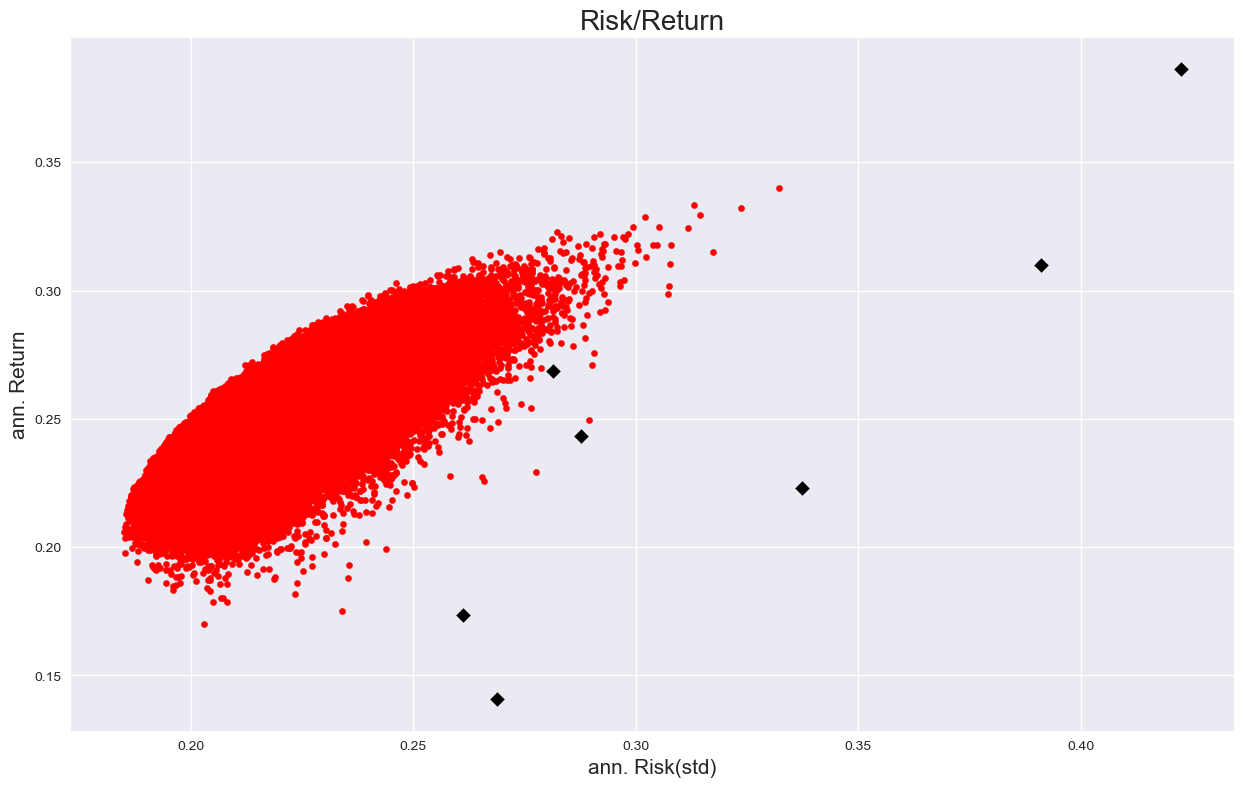

In [54]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Portfolio Analysis and Sharpe Ratio

## Sharpe Ratio 
This ratio basically used to measure the risk adjusted return in an investment. It calculates the expected or Actual return on an investment. The primary purpose of sharpe ratio is to determine whether an investor making signifiacant greater return on the investment in exchange for additional risk inherent in equity investing as compared to investing in risk-free instrument. 

In [55]:
risk_free_rate = 0.072
risk_free_risk = 0

In [56]:
rf = [risk_free_rate,risk_free_risk]
rf

[0.072, 0]

In [57]:
summary

,Return,Risk
DLF.NS,0.39,0.42
HDFCBANK.NS,0.14,0.27
INFY.NS,0.24,0.29
ITC.NS,0.17,0.26
M&M.NS,0.22,0.34
SUNPHARMA.NS,0.27,0.28
TATASTEEL.NS,0.31,0.39


In [58]:
port_summary.head()

,Return,Risk
0,0.27,0.24
1,0.25,0.22
2,0.25,0.23
3,0.25,0.22
4,0.24,0.21


In [59]:
summary["Sharpe"] =  (summary["Return"].sub(rf[0]))/summary["Risk"]

In [60]:
summary

,Return,Risk,Sharpe
DLF.NS,0.39,0.42,0.74
HDFCBANK.NS,0.14,0.27,0.26
INFY.NS,0.24,0.29,0.60
ITC.NS,0.17,0.26,0.39
M&M.NS,0.22,0.34,0.45
SUNPHARMA.NS,0.27,0.28,0.70
TATASTEEL.NS,0.31,0.39,0.61


In [61]:
port_summary["Sharpe"] =  (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [62]:
port_summary

,Return,Risk,Sharpe
0,0.27,0.24,0.81
1,0.25,0.22,0.80
2,0.25,0.23,0.78
3,0.25,0.22,0.81
4,0.24,0.21,0.77
...,...,...,...
99995,0.27,0.22,0.87
99996,0.22,0.21,0.72
99997,0.26,0.23,0.80
99998,0.24,0.21,0.80


In [63]:
summary.describe()

,Return,Risk,Sharpe
count,7.00,7.00,7.00
mean,0.25,0.32,0.53
std,0.08,0.06,0.18
min,0.14,0.26,0.26
25%,0.20,0.28,0.42
50%,0.24,0.29,0.60
75%,0.29,0.36,0.65
max,0.39,0.42,0.74


In [64]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.00,100000.00,100000.00
mean,0.25,0.22,0.80
std,0.02,0.02,0.05
min,0.17,0.19,0.44
25%,0.24,0.21,0.77
50%,0.25,0.22,0.81
75%,0.26,0.23,0.84
max,0.34,0.33,0.95


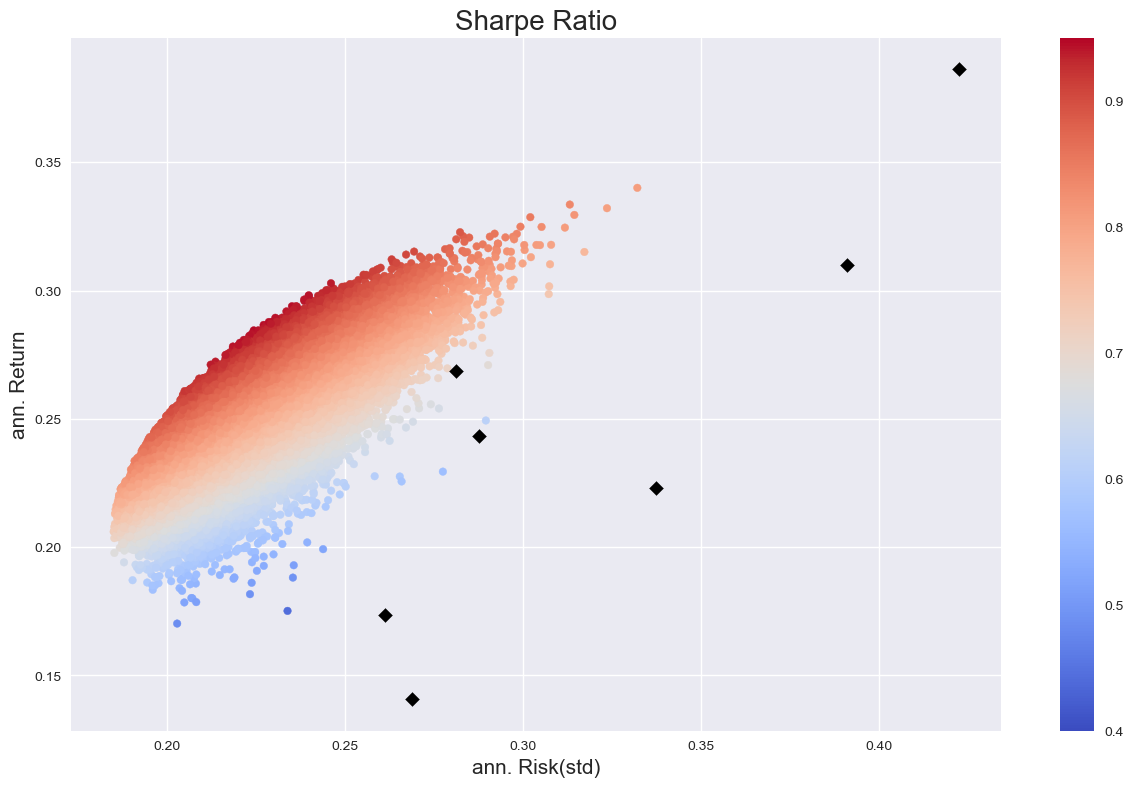

In [65]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 30, 
        c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.40, vmax = 0.95, alpha = 1.00)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## Finding the Optimal Portfolio

In [66]:
port_summary.head()

,Return,Risk,Sharpe
0,0.27,0.24,0.81
1,0.25,0.22,0.80
2,0.25,0.23,0.78
3,0.25,0.22,0.81
4,0.24,0.21,0.77


In [67]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.00,100000.00,100000.00
mean,0.25,0.22,0.80
std,0.02,0.02,0.05
min,0.17,0.19,0.44
25%,0.24,0.21,0.77
50%,0.25,0.22,0.81
75%,0.26,0.23,0.84
max,0.34,0.33,0.95


In [68]:
weights

array([[0.17931222, 0.07366913, 0.05840494, ..., 0.18523372, 0.10893254,
        0.25250652],
       [0.21891035, 0.15373306, 0.12534296, ..., 0.23304556, 0.14019252,
        0.01907643],
       [0.12470984, 0.23121873, 0.05717584, ..., 0.16653848, 0.16662502,
        0.19876192],
       ...,
       [0.11331972, 0.13262373, 0.15051699, ..., 0.16938112, 0.09072875,
        0.25258575],
       [0.1220449 , 0.09387879, 0.11891423, ..., 0.21799547, 0.13218041,
        0.10574074],
       [0.15975023, 0.2196852 , 0.11278747, ..., 0.09584117, 0.12973807,
        0.25881516]])

In [69]:
msrp = port_summary.Sharpe.idxmax()
msrp

290

## Findings 
Here we are finding the portfolio number 290 having the ideal sharpe ratio with favourable risk and reward out of the 100,000 simulation.

In [70]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.28
Risk     0.22
Sharpe   0.95
Name: 290, dtype: float64

In [71]:
msrp_w = weights[msrp,:]
msrp_w

array([0.22593023, 0.0330894 , 0.25191943, 0.03862702, 0.01110858,
       0.34042046, 0.09890489])

In [72]:
opt_weights = pd.Series(index = stocks.columns, data = msrp_w)

In [73]:
opt_weights

DLF.NS         0.23
HDFCBANK.NS    0.03
INFY.NS        0.25
ITC.NS         0.04
M&M.NS         0.01
SUNPHARMA.NS   0.34
TATASTEEL.NS   0.10
dtype: float64

In [74]:
ret.corr()

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
DLF.NS,1.00,0.45,0.26,0.40,0.48,0.32,0.48
HDFCBANK.NS,0.45,1.00,0.34,0.31,0.44,0.24,0.37
INFY.NS,0.26,0.34,1.00,0.21,0.26,0.25,0.28
ITC.NS,0.40,0.31,0.21,1.00,0.32,0.27,0.34
M&M.NS,0.48,0.44,0.26,0.32,1.00,0.29,0.39
SUNPHARMA.NS,0.32,0.24,0.25,0.27,0.29,1.00,0.32
TATASTEEL.NS,0.48,0.37,0.28,0.34,0.39,0.32,1.00


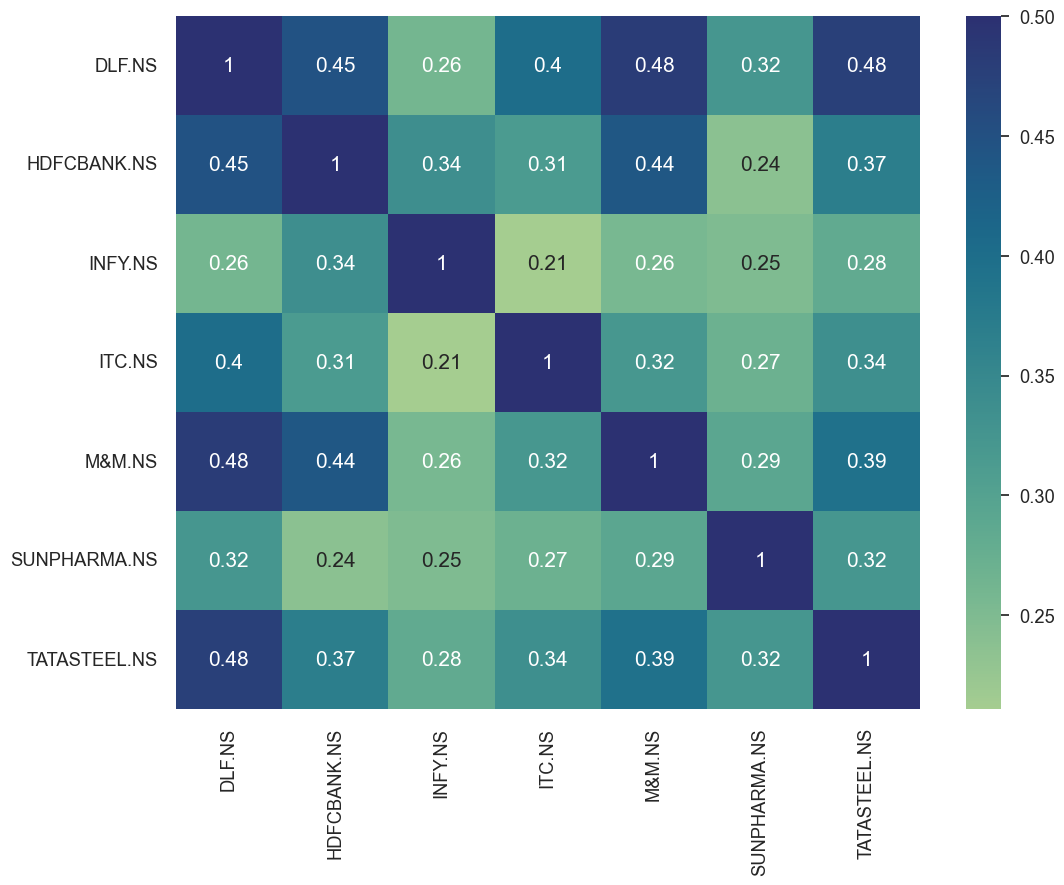

In [75]:
plt.figure(figsize = (12,9))
sns.set(font_scale = 1.2)
sns.heatmap(ret.corr(), cmap = "crest", annot = True, annot_kws ={"size":15}, vmax =0.5 )
plt.show()

## Systematic and Unsytematic (diversificable) Risk

In [76]:
summary

,Return,Risk,Sharpe
DLF.NS,0.39,0.42,0.74
HDFCBANK.NS,0.14,0.27,0.26
INFY.NS,0.24,0.29,0.60
ITC.NS,0.17,0.26,0.39
M&M.NS,0.22,0.34,0.45
SUNPHARMA.NS,0.27,0.28,0.70
TATASTEEL.NS,0.31,0.39,0.61


In [77]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [78]:
summary

,Return,Risk,Sharpe,TotalRisk_var
DLF.NS,0.39,0.42,0.74,0.18
HDFCBANK.NS,0.14,0.27,0.26,0.07
INFY.NS,0.24,0.29,0.60,0.08
ITC.NS,0.17,0.26,0.39,0.07
M&M.NS,0.22,0.34,0.45,0.11
SUNPHARMA.NS,0.27,0.28,0.70,0.08
TATASTEEL.NS,0.31,0.39,0.61,0.15


In [79]:
ret.head()

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
Date,,,,,,,
2019-01-01,0.02,0.01,0.01,0.00,-0.04,0.01,-0.01
2019-01-02,-0.04,-0.01,0.01,-0.01,-0.04,0.01,-0.04
2019-01-03,-0.00,-0.01,0.00,-0.01,-0.03,-0.01,-0.03
2019-01-04,0.02,0.00,-0.01,0.01,0.01,-0.01,0.01
2019-01-07,0.03,0.00,0.02,0.00,0.01,-0.01,-0.00


In [80]:
COV = ret.cov()*252

In [81]:
COV

,DLF.NS,HDFCBANK.NS,INFY.NS,ITC.NS,M&M.NS,SUNPHARMA.NS,TATASTEEL.NS
DLF.NS,0.18,0.05,0.03,0.04,0.07,0.04,0.08
HDFCBANK.NS,0.05,0.07,0.03,0.02,0.04,0.02,0.04
INFY.NS,0.03,0.03,0.08,0.02,0.02,0.02,0.03
ITC.NS,0.04,0.02,0.02,0.07,0.03,0.02,0.03
M&M.NS,0.07,0.04,0.02,0.03,0.11,0.03,0.05
SUNPHARMA.NS,0.04,0.02,0.02,0.02,0.03,0.08,0.04
TATASTEEL.NS,0.08,0.04,0.03,0.03,0.05,0.04,0.15


## Conclusion:
Through the portfolio optimization and simulation conducted above, we've identified that portfolios characterized by higher diversification and optimal weightage tend to exhibit a potentially superior Sharpe ratio, offering a favorable risk-reward profile. Notably, the Equal-Weighted Portfolio (EWP) emerges as a risk-averse alternative, showcasing lower risk compared to individual stocks, which inherently carry higher levels of risk. This underscores the significance of diversification and strategic asset allocation in achieving a balanced portfolio that maximizes returns while minimizing risk exposure.